### 목표
- 붓꽃의 특성4개( 꽃잎의 길이, 너비/꽃받침의 길이, 너비)를 활용하여 품종을 분류하는 모델을 만들자
- knn모델의 이웃의 숫자를 조절해보자( 하이퍼파라미터 튜닝 )

In [92]:
from sklearn.datasets import load_iris # 붓꽃데이터
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # 분류 예측기
from sklearn.metrics import accuracy_score # 정확도 측정 도구

In [93]:
#{ '키' : '벨류' } # 딕셔너리
# 머신러닝 데이터셋 구조 : 번치객체(bunch) - 딕셔너리와 같음
# 데이터확인
iris_data = load_iris()
iris_data

# iris_data 키값들 확인
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [94]:
# 특성(문제 데이터) 확인
iris_data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [95]:
# 특성 이름 확인
iris_data.feature_names

# ['sepal length (cm)',  꽃받침의 길이
#  'sepal width (cm)',   꽃받침의 너비
#  'petal length (cm)',  꽃잎의 길이
#  'petal width (cm)']   꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [96]:
# Label(실제답)
# target
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
# Label의 이름 확인
iris_data.target_names
# ['setosa' - 0 , 'versicolor' - 1 , 'virginica' - 2] 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
# iris_data의 모든 정보 확인
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터셋 구성하기
- 문제데이터만 데이터 프레임화
- 문제와 답 분리
- 훈련세트와 테스트세트 분리

In [99]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [100]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


문제와 답으로 분리

In [101]:
X = iris_df # 문제
y = iris_data.target

print('문제 크기 : ',X.shape)
print('답 크기 : ',y.shape)

문제 크기 :  (150, 4)
답 크기 :  (150,)


훈련셋, 테스트셋으로 분리

In [102]:
# 분리하는 도구
from sklearn.model_selection import train_test_split

In [172]:
# test_size = 0.3
# random_state 데이터를 랜덤하게 섞는 기준
# train_test_split 기능 : 1. 랜덤샘플링 2. train, test로 분리

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=65)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
132,6.4,2.8,5.6,2.2
129,7.2,3.0,5.8,1.6
83,6.0,2.7,5.1,1.6
19,5.1,3.8,1.5,0.3
27,5.2,3.5,1.5,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
40,5.0,3.5,1.3,0.3
63,6.1,2.9,4.7,1.4
117,7.7,3.8,6.7,2.2


In [154]:
# 크기 확인
print('훈련 문제:',X_train.shape)
print('훈련 답:', y_train.shape)
print('테스트 문제:',X_test.shape)
print('테스트 답:', y_test.shape)

훈련 문제: (105, 4)
훈련 답: (105,)
테스트 문제: (45, 4)
테스트 답: (45,)


In [155]:
# y_train 훈련용 답을 기준으로 각 클래스 개수 확인
import numpy as np
np.bincount(y_train)

array([33, 33, 39], dtype=int64)

### EDA 
- 산점도 행렬 그려보기 : 한꺼번에 변수간의 관계를 파악
- 어떤 특성 데이터가 품종을 잘 분류하고 있는가?

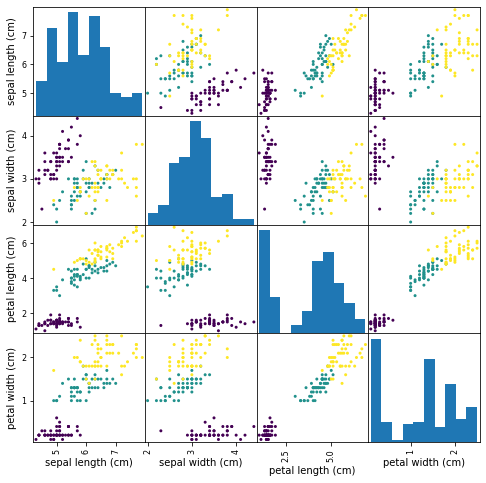

In [106]:
pd.plotting.scatter_matrix(iris_df, figsize=(8,8), c=y, alpha=1) # alpha 투명도
plt.show()
# 같은 품종끼리 밀집도가 높으면 변수간의 관계성이 높음

### 모델링

In [144]:
# 1. 모델 객체 생성
knn_model = KNeighborsClassifier(n_neighbors=21)

In [145]:
# 2. 모델 학습 fit
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [146]:
# 3. 모델 예측 predict
pre = knn_model.predict(X_test)

# 숫자가 아니라 품종의 이름으로 확인해보기
iris_data['target_names'][pre]

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa'], dtype='<U10')

In [147]:
# 4. 모델 성능 평가 score
# accuracy_score
accuracy_score(y_test,pre)
knn_model.score(X_test,y_test) # score(테스트문제, 테스트 답)

0.9333333333333333

In [125]:
# k값을 바꿈을 통해서 과대적합을 해소해주었음

### 하이퍼 파라미터 튜닝

In [126]:
test_lst = [] # 테스트 정확도 저장
train_lst = [] # 트레인 정확도 저장

neighbers_setting = range(1,50) # k값을 1~49까지 설정
for k in neighbers_setting:
    knn_cf = KNeighborsClassifier(n_neighbors=k)
    knn_cf.fit(X_train,y_train)
    
    # 테스트에 대한 정확도
    test_result = knn_cf.score(X_test, y_test)
    test_lst.append(test_result)
    # 트레인에 대한 정확도
    train_result = knn_cf.score(X_train,y_train)
    train_lst.append(train_result)

- 복잡도 곡선 그려보기

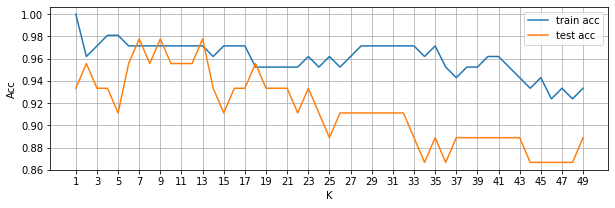

In [127]:
plt.figure(figsize=(10,3)) # figsize : 그래프 사이즈
plt.plot(neighbers_setting, train_lst, label='train acc')
plt.plot(neighbers_setting, test_lst, label='test acc')
plt.grid() # 눈금격자표시
plt.xlabel('K')
plt.ylabel('Acc')
plt.xticks(range(1,50,2))
plt.legend()
plt.show()

- 하이퍼 파라미터 튜닝  
n_neighbors = 5